In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format


## CONFUSION MATRIX WITHOUT THE SKLearn FUNCTION)

In [3]:
# Grab and process the raw data.
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['spam', 'message']

# Enumerate our spammy keywords.
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
)

sms_raw['allcaps'] = sms_raw.message.str.isupper()
sms_raw['spam'] = (sms_raw['spam'] == 'spam')
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
y_pred = bnb.fit(data, target).predict(data)


In [4]:
sms_raw['spam'].value_counts()

False    4825
True      747
Name: spam, dtype: int64

In [5]:
# Calculate the accuracy of your model here.
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
accuracy = (1-(target != y_pred).sum()/data.shape[0])*100
print("accuracy {:0.2f}".format(accuracy))


Number of mislabeled points out of a total 5572 points : 604
accuracy 89.16


In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[4770,   55],
       [ 549,  198]], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


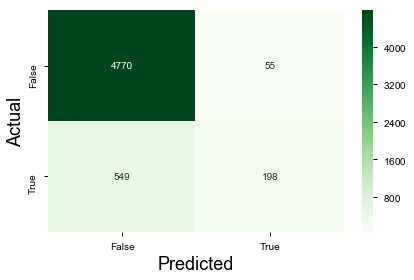

In [7]:

y_actu = pd.Series(target, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
sns.heatmap(df_confusion,annot=True,cmap="Greens",fmt='g')


In [8]:

tn = df_confusion.iloc[0,0] #198
fp = df_confusion.iloc[0,1] #55
fn = df_confusion.iloc[1,0] #549
tp = df_confusion.iloc[1,1] #4770

sensitivity= tp/(tp+fn) #true pos/(total actual pos) -> 198/(198+549)
specificity = tn/(tn+fp) #true neg/(total actual neg) -> 4770/(4770+55)

print("tp {}".format(tp))
print("fp {}".format(fp))
print("fn {}".format(fn))
print("tn {}".format(tn))

print(r"sensitivity-ability to select positives-spams {:0.2f}".format(sensitivity)) #27 percent, bad at selecting ham
print("specificity-ability to select negatives-hams  {:0.2f}".format(specificity)) #99 percent, 

tp 198
fp 55
fn 549
tn 4770
sensitivity-ability to select positives-spams 0.27
specificity-ability to select negatives-hams  0.99
